In [1]:

with open('/home/project/Desktop/shashank/English HTR/output/iam/flor/2023-09-27 02:53:40.574045/predict.txt') as f1:
    lines = f1.readlines()

'''
for i, line in enumerate(lines):
    lines[i] = line.split(" ", 1)[1]
    
    
with open('new_predict','w') as f2:
    for i in lines:
        f2.write("%s\n" % i)
    f2.close()
'''    
# open prediction file in read mode
fn = open('/home/project/Desktop/shashank/English HTR/output/iam/flor/2023-09-27 02:53:40.574045/predict.txt', 'r')
  
# create list to store predicted text & GT
p=[]
g=[]
# read the content of the file line by line
cont = fn.readlines()
type(cont)
for i in range(0, len(cont)):
    if(i % 2 != 0):
        p.append(cont[i])
    else:
        g.append(cont[i])


In [2]:
g[134]

'TE_L plenty of time together in the future . And\n'

In [3]:
for i, line in enumerate(g):
    print(i)
    split_result = line.split(" ", 1)
    if len(split_result) > 1:
        g[i] = split_result[1]

for i, line in enumerate(p):
    split_result = line.split(" ", 1)
    if len(split_result) > 1:
        p[i] = split_result[1]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [43]:
'''
#remove TE_L & TE_P
for i, line in enumerate(g):
    print(i)
    g[i] = line.split(" ", 1)[1]
for i, line in enumerate(p):
    p[i] = line.split(" ", 1)[1]
'''

'\n#remove TE_L & TE_P\nfor i, line in enumerate(g):\n    print(i)\n    g[i] = line.split(" ", 1)[1]\nfor i, line in enumerate(p):\n    p[i] = line.split(" ", 1)[1]\n'

In [4]:
#remove \n inserted at last
g = [x[:-1] for x in g]
p = [x[:-1] for x in p]

In [5]:
p

['He lose from his breakfart-nook bench',
 'and came into te livingioom , where',
 'Heatler and Meve st0od agpan at',
 'lis entrance . He came , almon falling',
 'forwad in On ungainly sluttle , neck',
 'M,as out , ams dangling losely .',
 'Tlen , abiuply , be diew limself up',
 'And valked on te wery lips of',
 'lis 10es . He strelcled his orens',
 'ower his lead and youned agaped ,',
 'drawing-in gred beals 1lar',
 'became arcl tialsatecsam',
 '" The , have come ! " he said reverently , gripping his',
 'hands togetherbetween his knees and leaning',
 'forword . " \'In\'t it a glosions thing ! I ong awoited',
 'transcendent event , the exalted desire of all',
 'mankind through all ages ! The kingdom of the',
 'Mhind is at hand ! " He turned beaming eyes',
 'upward and shook his head slowly from',
 'a superfluas precantion for there was no other car',
 'obroad ; and no pedestrian to cross his path nor to wait',
 'at an intersection for the light to change . At his',
 'apartment he garag

In [6]:
#alg4() for calculating matrix

import string
import numpy as np
sub = dict.fromkeys(string.printable[:95], 0)
ins = dict.fromkeys(string.printable[:95], 0)
delete = dict.fromkeys(string.printable[:95], 0)
array=np.zeros(shape=(len(string.printable[:95]), len(string.printable[:95])),dtype=int)



def alg4(word1,word2):
  M=[[float('inf')]*(len(word2)+1) for i in range(len(word1)+1)]
          
  #filling last row
  for i in range(len(word2)+1):
    M[len(word1)][i]=len(word2)-i
          
  #filling last column
  for j in range(len(word1)+1):
    M[j][len(word2)]=len(word1)-j
              
  #filling bottom to up manner
          
  for i in range(len(word1)-1,-1,-1):
    for j in range(len(word2)-1,-1,-1):
      if word1[i]==word2[j]:
        M[i][j]=M[i+1][j+1]
      else:
        M[i][j]=1+min(M[i+1][j],M[i][j+1],M[i+1][j+1])

  x,y=0,0
  #print(x,y)
  count=0
  while x<len(M)-1 and y<len(M[0])-1:
    current=M[x][y]
    dia=M[x+1][y+1]
    right=M[x][y+1]
    bottom=M[x+1][y]
    if dia<=right and dia<=bottom and dia<=current:
      if dia==current-1:
        print("Substitution-->",word1[x],"replaced by",word2[y])
        array[string.printable[:95].find(word1[x]),string.printable[:95].find(word2[y])]=array[string.printable[:95].find(word1[x]),string.printable[:95].find(word2[y])]+1
        sub[word1[x]]=sub[word1[x]]+1
        count=count+1
        x=x+1
        y=y+1
      else:
        print("No operation-->",word1[x])
        array[string.printable[:95].find(word1[x]),string.printable[:95].find(word2[y])]=array[string.printable[:95].find(word1[x]),string.printable[:95].find(word2[y])]+1
        x=x+1
        y=y+1
      
    elif right<=bottom and right<=current:
      print("Insertion",word2[y])
      ins[word2[y]]=ins[word2[y]]+1

      count=count+1
      y=y+1
    else:
      print("Deletion",word1[x])
      delete[word1[x]]=delete[word1[x]]+1
      x=x+1
      count=count+1
  print("total operations",count)


In [7]:
g

['He rose from his breakfast-nook bench',
 'and came into the livingroom , where',
 'Heather and Steve stood aghast at',
 'his entrance . He came , almost falling',
 'forward in an ungainly shuffle , neck',
 'thrust out , arms dangling loosely .',
 'Then , abruptly , he drew himself up',
 'and walked on the very tips of',
 'his toes . He stretched his arms',
 'over his head and yawned agape ,',
 'drawing-in great breaths that',
 'became great sighs of ecstacy .',
 '" They have come ! " he said reverently , gripping his',
 'hands together between his knees and leaning',
 'forward . " Isn\'t it a glorious thing ! Long awaited',
 'transcendent event , the exalted desire of all',
 'mankind through all ages ! The Kingdom of the',
 'Mind is at hand ! " He turned beaming eyes',
 'upward and shook his head slowly from',
 'A superfluous precaution for there was no other car',
 'abroad ; and no pedestrian to cross his path nor to wait',
 'at an intersection for the light to change . At his',
 'a

In [9]:
#evaluate    
from data import evaluation

evaluate = evaluation.ocr_metrics(p, g)

print(evaluate)


[0.07038136 0.23111781 0.83449758]


In [10]:
import string       
for pred_text, gt_text in zip(p, g):        
	seq2 = pred_text
	seq1 = gt_text
	print("pred text:",seq2)
	print("ground truth:",seq1)
	#seq1=seq1.translate({ord(c): None for c in string.whitespace})

	#seq2=seq2.translate({ord(c): None for c in string.whitespace})
	#seq1=remove1(seq1)
	#seq2=remove1(seq2)
	#print("pred text2:",seq2)
	#print("ground truth2:",seq1)
	alg4(seq1,seq2)
 
print(ins)
print(delete)
print(sub)

pred text: He lose from his breakfart-nook bench
ground truth: He rose from his breakfast-nook bench
No operation--> H
No operation--> e
No operation-->  
Substitution--> r replaced by l
No operation--> o
No operation--> s
No operation--> e
No operation-->  
No operation--> f
No operation--> r
No operation--> o
No operation--> m
No operation-->  
No operation--> h
No operation--> i
No operation--> s
No operation-->  
No operation--> b
No operation--> r
No operation--> e
No operation--> a
No operation--> k
No operation--> f
No operation--> a
Substitution--> s replaced by r
No operation--> t
No operation--> -
No operation--> n
No operation--> o
No operation--> o
No operation--> k
No operation-->  
No operation--> b
No operation--> e
No operation--> n
No operation--> c
No operation--> h
total operations 2
pred text: and came into te livingioom , where
ground truth: and came into the livingroom , where
No operation--> a
No operation--> n
No operation--> d
No operation-->  
No operation--> 

No operation--> p
No operation--> u
No operation--> t
No operation--> t
No operation--> i
No operation--> n
No operation--> g
No operation-->  
No operation--> t
No operation--> h
No operation--> e
No operation--> i
No operation--> r
No operation-->  
No operation--> b
No operation--> e
No operation--> s
No operation--> t
No operation-->  
No operation--> f
No operation--> o
No operation--> o
No operation--> t
No operation-->  
No operation--> f
No operation--> o
No operation--> r
No operation--> w
No operation--> a
No operation--> r
No operation--> d
No operation-->  
No operation--> .
total operations 0
pred text: " Something's up " " said Lord Undertone ,
ground truth: ' Something 's up , ' said Lord Undertone ,
Substitution--> ' replaced by "
No operation-->  
No operation--> S
No operation--> o
No operation--> m
No operation--> e
No operation--> t
No operation--> h
No operation--> i
No operation--> n
No operation--> g
Deletion  
No operation--> '
No operation--> s
No operation--> 

No operation--> t
No operation--> h
No operation--> e
No operation-->  
No operation--> f
No operation--> a
No operation--> c
No operation--> t
No operation-->  
No operation--> t
No operation--> h
No operation--> a
No operation--> t
No operation-->  
No operation--> t
No operation--> h
No operation--> e
No operation-->  
No operation--> g
No operation--> r
No operation--> e
No operation--> e
No operation--> n
No operation-->  
No operation--> e
No operation--> a
No operation--> r
No operation--> t
No operation--> h
No operation-->  
No operation--> w
No operation--> a
No operation--> s
No operation-->  
No operation--> f
No operation--> a
Substitution--> l replaced by i
No operation--> l
No operation--> i
No operation--> n
No operation--> g
total operations 1
pred text: avay of a rabe of knots .
ground truth: away at a rate of knots .
No operation--> a
Substitution--> w replaced by v
No operation--> a
No operation--> y
No operation-->  
Substitution--> a replaced by o
Substitution--> 

No operation--> t
No operation--> h
No operation--> e
No operation-->  
No operation--> l
No operation--> i
No operation--> t
No operation--> t
No operation--> l
No operation--> e
No operation-->  
No operation--> h
No operation--> o
No operation--> m
Substitution--> b replaced by o
Substitution--> r replaced by n
No operation--> e
No operation-->  
No operation--> i
No operation--> n
No operation-->  
No operation--> b
No operation--> i
No operation--> g
No operation-->  
No operation--> o
No operation--> v
No operation--> e
No operation--> r
No operation--> a
No operation--> l
No operation--> l
No operation--> s
No operation-->  
No operation--> .
No operation-->  
No operation--> V
No operation--> e
No operation--> r
No operation--> y
No operation-->  
No operation--> s
No operation--> o
No operation--> o
No operation--> n
No operation-->  
No operation--> h
No operation--> e
total operations 2
pred text: had tim mugs filled with hat black coffee
ground truth: had tin mugs filled wi

No operation--> i
Substitution--> c replaced by e
No operation--> a
No operation--> t
No operation--> i
No operation--> o
No operation--> n
No operation-->  
No operation--> p
No operation--> o
No operation--> i
No operation--> n
No operation--> t
No operation--> e
No operation--> d
No operation-->  
No operation--> t
No operation--> o
Insertion  
Insertion .
Insertion  
Insertion .
No operation-->  
No operation--> E
No operation--> v
No operation--> e
No operation-->  
No operation--> b
No operation--> e
No operation--> i
No operation--> n
No operation--> g
No operation-->  
No operation--> h
No operation--> e
No operation--> l
No operation--> d
No operation-->  
No operation--> .
total operations 5
pred text: Jeoffrey sed himself to consiter the
ground truth: Geoffrey set himself to consider the
Substitution--> G replaced by J
No operation--> e
No operation--> o
No operation--> f
No operation--> f
No operation--> r
No operation--> e
No operation--> y
No operation-->  
No operation--

No operation--> T
No operation--> h
No operation--> e
No operation-->  
No operation--> y
No operation--> a
Substitution--> w replaced by u
No operation--> l
No operation-->  
No operation--> ,
No operation-->  
No operation--> r
No operation--> i
No operation--> d
No operation--> i
No operation--> n
No operation--> g
No operation-->  
No operation--> t
No operation--> h
No operation--> e
No operation-->  
No operation--> h
No operation--> i
No operation--> g
No operation--> h
No operation-->  
No operation--> w
No operation--> a
Substitution--> v replaced by s
No operation--> e
Substitution--> s replaced by r
No operation-->  
No operation--> w
No operation--> i
No operation--> t
No operation--> h
No operation-->  
No operation--> a
No operation--> n
No operation-->  
No operation--> a
No operation--> i
Substitution--> r replaced by s
No operation-->  
No operation--> t
No operation--> h
No operation--> a
No operation--> t
total operations 4
pred text: might have made an oecon finer e

No operation--> w
No operation--> o
No operation--> r
No operation--> r
No operation--> y
No operation-->  
No operation--> o
No operation--> f
total operations 0
pred text: There had been many suc brealfasts lately since the
ground truth: There had been many such breakfasts lately since the
No operation--> T
No operation--> h
No operation--> e
No operation--> r
No operation--> e
No operation-->  
No operation--> h
No operation--> a
No operation--> d
No operation-->  
No operation--> b
No operation--> e
No operation--> e
No operation--> n
No operation-->  
No operation--> m
No operation--> a
No operation--> n
No operation--> y
No operation-->  
No operation--> s
No operation--> u
No operation--> c
Deletion h
No operation-->  
No operation--> b
No operation--> r
No operation--> e
No operation--> a
Substitution--> k replaced by l
No operation--> f
No operation--> a
No operation--> s
No operation--> t
No operation--> s
No operation-->  
No operation--> l
No operation--> a
No operation--> 

No operation--> "
No operation-->  
No operation--> S
No operation--> o
No operation-->  
No operation--> g
No operation--> l
No operation--> a
No operation--> d
No operation-->  
No operation--> t
No operation--> h
No operation--> a
No operation--> t
No operation-->  
No operation--> y
No operation--> o
No operation--> u
No operation-->  
No operation--> a
No operation--> r
No operation--> e
No operation-->  
No operation--> h
No operation--> a
No operation--> v
No operation--> i
No operation--> n
No operation--> g
No operation-->  
No operation--> s
No operation--> u
No operation--> c
No operation--> h
No operation-->  
No operation--> a
No operation-->  
No operation--> l
No operation--> o
No operation--> v
No operation--> e
No operation--> l
No operation--> y
No operation-->  
No operation--> t
No operation--> i
No operation--> m
No operation--> e
No operation-->  
No operation--> ,
No operation-->  
No operation--> d
No operation--> e
No operation--> a
No operation--> r
No operati

No operation--> "
No operation-->  
Substitution--> D replaced by B
No operation--> o
No operation--> n
No operation--> '
No operation--> t
No operation-->  
No operation--> b
No operation--> e
No operation-->  
No operation--> s
No operation--> u
No operation--> c
No operation--> h
No operation-->  
No operation--> a
No operation-->  
No operation--> b
No operation--> a
No operation--> b
No operation--> y
Deletion  
Deletion !
No operation-->  
No operation--> "
No operation-->  
No operation--> T
No operation--> h
No operation--> e
No operation--> y
No operation-->  
No operation--> w
No operation--> e
No operation--> r
No operation--> e
No operation-->  
No operation--> g
No operation--> o
No operation--> i
No operation--> n
No operation--> g
total operations 3
pred text: to have , an oper grarnel any
ground truth: to have an open quarrel
No operation--> t
No operation--> o
No operation-->  
No operation--> h
No operation--> a
No operation--> v
No operation--> e
Insertion  
Insertio

<AxesSubplot:>

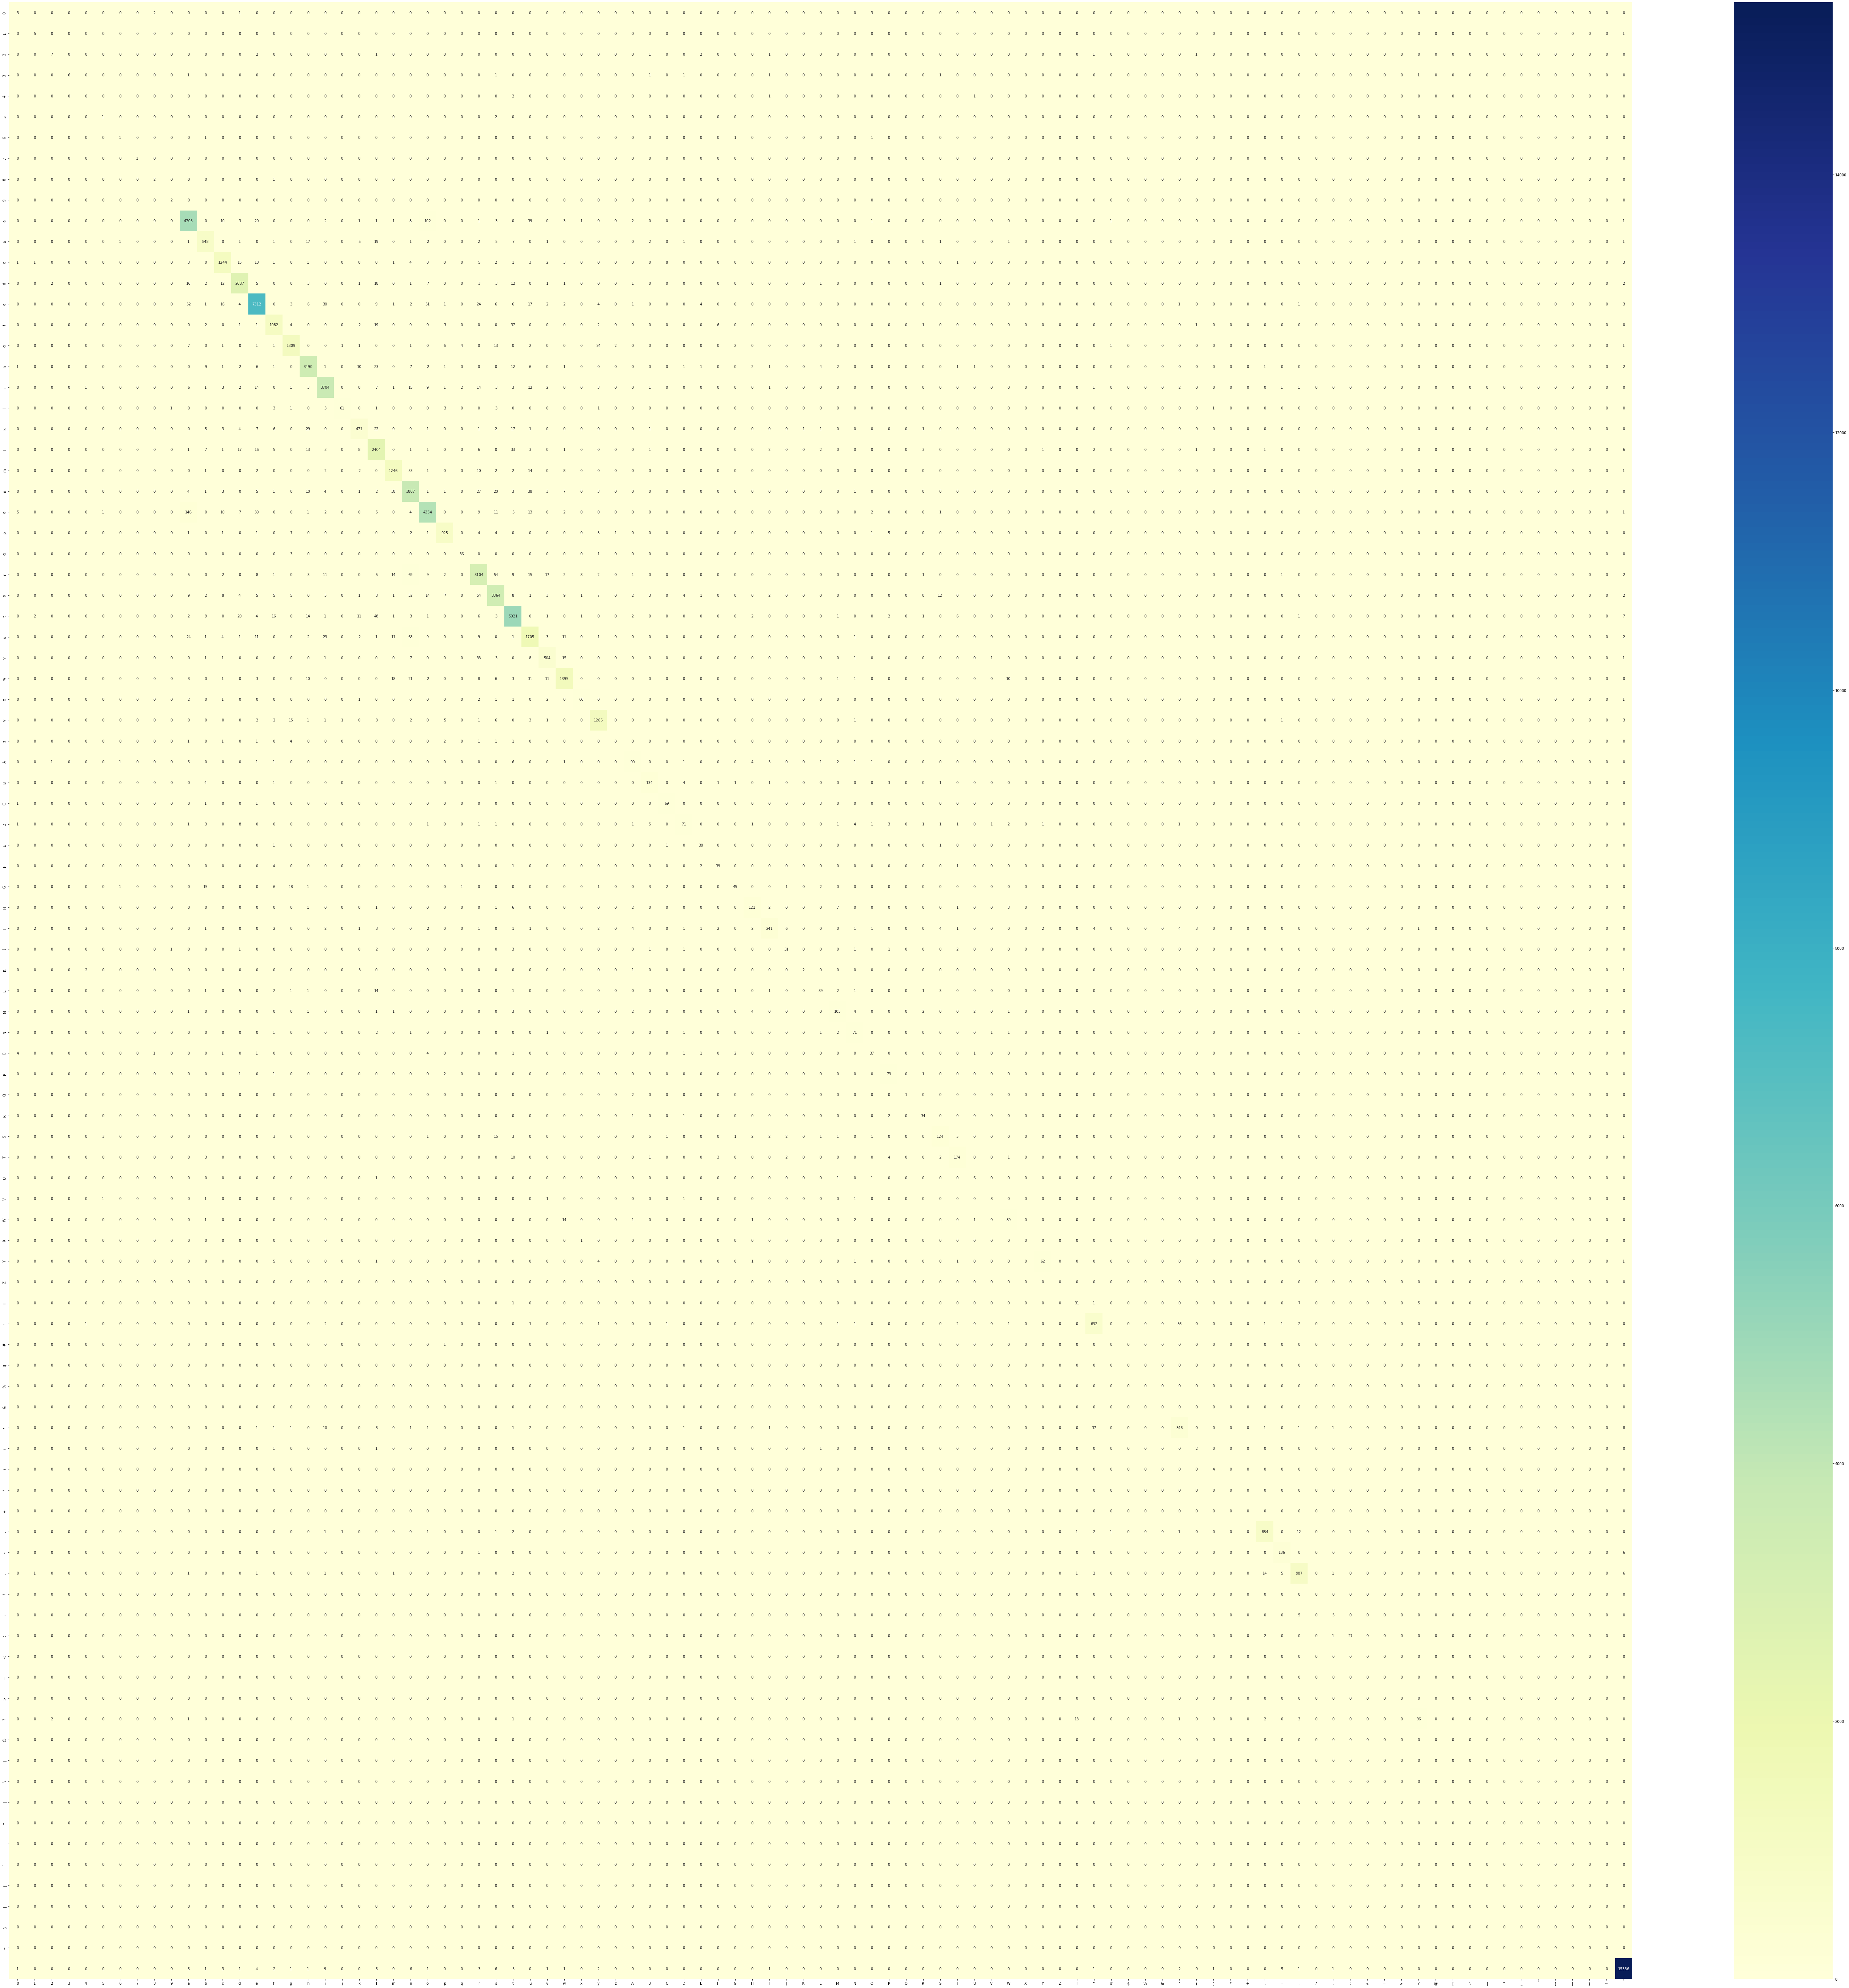

In [11]:
new=array
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
'''
plt.figure(figsize = (100,100))
#new=new.pivot(string.printable[10:62])
df_cm = pd.DataFrame(new, index = [i for i in string.printable[0:95]],
                  columns = [i for i in string.printable[0:95]])
ax = sn.heatmap(new, annot=True, fmt="d",cmap="YlGnBu",robust=True)
'''



import pandas as pd

df_cm = pd.DataFrame(array, index = [i for i in string.printable[0:95]],
                  columns = [i for i in string.printable[0:95]])
plt.figure(figsize = (100,100))
sn.heatmap(df_cm, annot=True,fmt="d",cmap="YlGnBu")

In [12]:
ins

{'0': 0,
 '1': 0,
 '2': 0,
 '3': 0,
 '4': 0,
 '5': 0,
 '6': 0,
 '7': 0,
 '8': 0,
 '9': 1,
 'a': 14,
 'b': 3,
 'c': 19,
 'd': 3,
 'e': 50,
 'f': 1,
 'g': 6,
 'h': 13,
 'i': 24,
 'j': 0,
 'k': 2,
 'l': 33,
 'm': 4,
 'n': 42,
 'o': 21,
 'p': 5,
 'q': 0,
 'r': 53,
 's': 36,
 't': 39,
 'u': 18,
 'v': 11,
 'w': 3,
 'x': 1,
 'y': 6,
 'z': 0,
 'A': 2,
 'B': 1,
 'C': 1,
 'D': 1,
 'E': 0,
 'F': 0,
 'G': 0,
 'H': 3,
 'I': 2,
 'J': 0,
 'K': 0,
 'L': 0,
 'M': 0,
 'N': 0,
 'O': 1,
 'P': 0,
 'Q': 0,
 'R': 0,
 'S': 0,
 'T': 1,
 'U': 0,
 'V': 1,
 'W': 1,
 'X': 0,
 'Y': 0,
 'Z': 0,
 '!': 2,
 '"': 4,
 '#': 4,
 '$': 0,
 '%': 0,
 '&': 3,
 "'": 14,
 '(': 1,
 ')': 0,
 '*': 0,
 '+': 0,
 ',': 12,
 '-': 2,
 '.': 14,
 '/': 0,
 ':': 1,
 ';': 0,
 '<': 0,
 '=': 0,
 '>': 0,
 '?': 0,
 '@': 0,
 '[': 0,
 '\\': 0,
 ']': 0,
 '^': 0,
 '_': 0,
 '`': 0,
 '{': 0,
 '|': 0,
 '}': 0,
 '~': 0,
 ' ': 139}

In [13]:
sub

{'0': 6,
 '1': 1,
 '2': 9,
 '3': 7,
 '4': 4,
 '5': 2,
 '6': 3,
 '7': 0,
 '8': 1,
 '9': 0,
 'a': 200,
 'b': 70,
 'c': 81,
 'd': 92,
 'e': 247,
 'f': 79,
 'g': 68,
 'h': 99,
 'i': 110,
 'j': 17,
 'k': 102,
 'l': 135,
 'm': 98,
 'n': 173,
 'o': 264,
 'p': 31,
 'q': 4,
 'r': 241,
 's': 230,
 't': 165,
 'u': 185,
 'v': 72,
 'w': 129,
 'x': 11,
 'y': 48,
 'z': 12,
 'A': 29,
 'B': 17,
 'C': 6,
 'D': 40,
 'E': 3,
 'F': 8,
 'G': 51,
 'H': 24,
 'I': 57,
 'J': 21,
 'K': 7,
 'L': 39,
 'M': 22,
 'N': 12,
 'O': 17,
 'P': 8,
 'Q': 2,
 'R': 4,
 'S': 47,
 'T': 26,
 'U': 3,
 'V': 5,
 'W': 20,
 'X': 1,
 'Y': 14,
 'Z': 0,
 '!': 14,
 '"': 71,
 '#': 1,
 '$': 0,
 '%': 0,
 '&': 0,
 "'": 71,
 '(': 3,
 ')': 0,
 '*': 0,
 '+': 0,
 ',': 24,
 '-': 7,
 '.': 36,
 '/': 0,
 ':': 5,
 ';': 3,
 '<': 0,
 '=': 0,
 '>': 0,
 '?': 23,
 '@': 0,
 '[': 0,
 '\\': 0,
 ']': 0,
 '^': 0,
 '_': 0,
 '`': 0,
 '{': 0,
 '|': 0,
 '}': 0,
 '~': 0,
 ' ': 70}

In [14]:
delete

{'0': 0,
 '1': 0,
 '2': 0,
 '3': 0,
 '4': 0,
 '5': 0,
 '6': 0,
 '7': 0,
 '8': 0,
 '9': 0,
 'a': 32,
 'b': 9,
 'c': 31,
 'd': 20,
 'e': 107,
 'f': 25,
 'g': 19,
 'h': 39,
 'i': 46,
 'j': 0,
 'k': 17,
 'l': 63,
 'm': 7,
 'n': 78,
 'o': 47,
 'p': 8,
 'q': 0,
 'r': 139,
 's': 88,
 't': 64,
 'u': 24,
 'v': 14,
 'w': 4,
 'x': 2,
 'y': 10,
 'z': 0,
 'A': 1,
 'B': 3,
 'C': 1,
 'D': 1,
 'E': 0,
 'F': 0,
 'G': 1,
 'H': 3,
 'I': 14,
 'J': 0,
 'K': 0,
 'L': 0,
 'M': 0,
 'N': 1,
 'O': 2,
 'P': 1,
 'Q': 0,
 'R': 1,
 'S': 2,
 'T': 0,
 'U': 0,
 'V': 1,
 'W': 0,
 'X': 0,
 'Y': 2,
 'Z': 0,
 '!': 7,
 '"': 13,
 '#': 1,
 '$': 0,
 '%': 0,
 '&': 0,
 "'": 60,
 '(': 1,
 ')': 2,
 '*': 0,
 '+': 0,
 ',': 23,
 '-': 4,
 '.': 25,
 '/': 0,
 ':': 0,
 ';': 0,
 '<': 0,
 '=': 0,
 '>': 0,
 '?': 4,
 '@': 0,
 '[': 0,
 '\\': 0,
 ']': 0,
 '^': 0,
 '_': 0,
 '`': 0,
 '{': 0,
 '|': 0,
 '}': 0,
 '~': 0,
 ' ': 320}

In [15]:
    
    
    
    
 #evaluation metrics added
 
  
    
# Copyright (c) OpenMMLab. All rights reserved.
import re
from difflib import SequenceMatcher

from rapidfuzz import string_metric


def cal_true_positive_char(pred, gt):
  all_opt = SequenceMatcher(None, pred, gt)
  true_positive_char_num = 0
  for opt, _, _, s2, e2 in all_opt.get_opcodes():
        if opt == 'equal':
          true_positive_char_num += (e2 - s2)
        else:
          pass
  return true_positive_char_num


def count_matches(pred_texts, gt_texts):
    match_res = {
        'gt_char_num': 0,
        'pred_char_num': 0,
        'true_positive_char_num': 0,
        'gt_word_num': 0,
        'match_word_num': 0,
        'match_word_ignore_case': 0,
        'match_word_ignore_case_symbol': 0
    }
    comp = re.compile('[^A-Z^a-z^0-9^\u4e00-\u9fa5]')
    norm_ed_sum = 0.0
    for pred_text, gt_text in zip(pred_texts, gt_texts):
        if gt_text == pred_text:
            match_res['match_word_num'] += 1
        gt_text_lower = gt_text.lower()
        pred_text_lower = pred_text.lower()
        if gt_text_lower == pred_text_lower:
            match_res['match_word_ignore_case'] += 1
        gt_text_lower_ignore = comp.sub('', gt_text_lower)
        pred_text_lower_ignore = comp.sub('', pred_text_lower)
        if gt_text_lower_ignore == pred_text_lower_ignore:
            match_res['match_word_ignore_case_symbol'] += 1
        match_res['gt_word_num'] += 1

        # normalized edit distance
        edit_dist = string_metric.levenshtein(pred_text_lower_ignore,
                                              gt_text_lower_ignore)
        norm_ed = float(edit_dist) / max(1, len(gt_text_lower_ignore),
                                         len(pred_text_lower_ignore))
        norm_ed_sum += norm_ed

        # number to calculate char level recall & precision
        match_res['gt_char_num'] += len(gt_text_lower_ignore)
        match_res['pred_char_num'] += len(pred_text_lower_ignore)
        true_positive_char_num = cal_true_positive_char(
            pred_text_lower_ignore, gt_text_lower_ignore)
        match_res['true_positive_char_num'] += true_positive_char_num

    normalized_edit_distance = norm_ed_sum / max(1, len(gt_texts))
    match_res['ned'] = normalized_edit_distance

    return match_res


def eval_ocr_metric(pred_texts, gt_texts):
    """Evaluate the text recognition performance with metric: word accuracy and
    1-N.E.D. See https://rrc.cvc.uab.es/?ch=14&com=tasks for details.

    Args:
        pred_texts (list[str]): Text strings of prediction.
        gt_texts (list[str]): Text strings of ground truth.

    Returns:
        eval_res (dict[str: float]): Metric dict for text recognition, include:
            - word_acc: Accuracy in word level.
            - word_acc_ignore_case: Accuracy in word level, ignore letter case.
            - word_acc_ignore_case_symbol: Accuracy in word level, ignore
                letter case and symbol. (default metric for
                academic evaluation)
            - char_recall: Recall in character level, ignore
                letter case and symbol.
            - char_precision: Precision in character level, ignore
                letter case and symbol.
            - 1-N.E.D: 1 - normalized_edit_distance.
    """
    assert isinstance(pred_texts, list)
    assert isinstance(gt_texts, list)
    assert len(pred_texts) == len(gt_texts)

    match_res = count_matches(pred_texts, gt_texts)
    eps = 1e-8
    char_recall = 1.0 * match_res['true_positive_char_num'] / (
        eps + match_res['gt_char_num'])
    char_precision = 1.0 * match_res['true_positive_char_num'] / (
        eps + match_res['pred_char_num'])
    word_acc = 1.0 * match_res['match_word_num'] / (
        eps + match_res['gt_word_num'])
    word_acc_ignore_case = 1.0 * match_res['match_word_ignore_case'] / (
        eps + match_res['gt_word_num'])
    word_acc_ignore_case_symbol = 1.0 * match_res[
        'match_word_ignore_case_symbol'] / (
            eps + match_res['gt_word_num'])

    eval_res = {}
    eval_res['word_acc'] = word_acc
    eval_res['word_acc_ignore_case'] = word_acc_ignore_case
    eval_res['word_acc_ignore_case_symbol'] = word_acc_ignore_case_symbol
    eval_res['char_recall'] = char_recall
    eval_res['char_precision'] = char_precision
    eval_res['1-N.E.D'] = 1.0 - match_res['ned']

    for key, value in eval_res.items():
        eval_res[key] = float('{:.4f}'.format(value))
    print("predicted text:",pred_texts)
    return eval_res
    print(e_corpus)
    
    
    
evaluate1 = count_matches(p, g) 

print("\neval1=",evaluate1)



eval1= {'gt_char_num': 62286, 'pred_char_num': 61842, 'true_positive_char_num': 58108, 'gt_word_num': 1861, 'match_word_num': 287, 'match_word_ignore_case': 308, 'match_word_ignore_case_symbol': 395, 'ned': 0.07555033599360207}


In [16]:
sorted_ins = dict(sorted(ins.items(), key=lambda item: item[1], reverse=True))

# Print the sorted dictionary
for char, count in sorted_ins.items():
    print(f"'{char}': {count}")

' ': 139
'r': 53
'e': 50
'n': 42
't': 39
's': 36
'l': 33
'i': 24
'o': 21
'c': 19
'u': 18
'a': 14
''': 14
'.': 14
'h': 13
',': 12
'v': 11
'g': 6
'y': 6
'p': 5
'm': 4
'"': 4
'#': 4
'b': 3
'd': 3
'w': 3
'H': 3
'&': 3
'k': 2
'A': 2
'I': 2
'!': 2
'-': 2
'9': 1
'f': 1
'x': 1
'B': 1
'C': 1
'D': 1
'O': 1
'T': 1
'V': 1
'W': 1
'(': 1
':': 1
'0': 0
'1': 0
'2': 0
'3': 0
'4': 0
'5': 0
'6': 0
'7': 0
'8': 0
'j': 0
'q': 0
'z': 0
'E': 0
'F': 0
'G': 0
'J': 0
'K': 0
'L': 0
'M': 0
'N': 0
'P': 0
'Q': 0
'R': 0
'S': 0
'U': 0
'X': 0
'Y': 0
'Z': 0
'$': 0
'%': 0
')': 0
'*': 0
'+': 0
'/': 0
';': 0
'<': 0
'=': 0
'>': 0
'?': 0
'@': 0
'[': 0
'\': 0
']': 0
'^': 0
'_': 0
'`': 0
'{': 0
'|': 0
'}': 0
'~': 0


In [17]:
sorted_sub = dict(sorted(sub.items(), key=lambda item: item[1], reverse=True))

# Print the sorted dictionary
for char, count in sorted_sub.items():
    print(f"'{char}': {count}")

'o': 264
'e': 247
'r': 241
's': 230
'a': 200
'u': 185
'n': 173
't': 165
'l': 135
'w': 129
'i': 110
'k': 102
'h': 99
'm': 98
'd': 92
'c': 81
'f': 79
'v': 72
'"': 71
''': 71
'b': 70
' ': 70
'g': 68
'I': 57
'G': 51
'y': 48
'S': 47
'D': 40
'L': 39
'.': 36
'p': 31
'A': 29
'T': 26
'H': 24
',': 24
'?': 23
'M': 22
'J': 21
'W': 20
'j': 17
'B': 17
'O': 17
'Y': 14
'!': 14
'z': 12
'N': 12
'x': 11
'2': 9
'F': 8
'P': 8
'3': 7
'K': 7
'-': 7
'0': 6
'C': 6
'V': 5
':': 5
'4': 4
'q': 4
'R': 4
'6': 3
'E': 3
'U': 3
'(': 3
';': 3
'5': 2
'Q': 2
'1': 1
'8': 1
'X': 1
'#': 1
'7': 0
'9': 0
'Z': 0
'$': 0
'%': 0
'&': 0
')': 0
'*': 0
'+': 0
'/': 0
'<': 0
'=': 0
'>': 0
'@': 0
'[': 0
'\': 0
']': 0
'^': 0
'_': 0
'`': 0
'{': 0
'|': 0
'}': 0
'~': 0


In [18]:
sorted_delete = dict(sorted(delete.items(), key=lambda item: item[1], reverse=True))

# Print the sorted dictionary
for char, count in sorted_delete.items():
    print(f"'{char}': {count}")

' ': 320
'r': 139
'e': 107
's': 88
'n': 78
't': 64
'l': 63
''': 60
'o': 47
'i': 46
'h': 39
'a': 32
'c': 31
'f': 25
'.': 25
'u': 24
',': 23
'd': 20
'g': 19
'k': 17
'v': 14
'I': 14
'"': 13
'y': 10
'b': 9
'p': 8
'm': 7
'!': 7
'w': 4
'-': 4
'?': 4
'B': 3
'H': 3
'x': 2
'O': 2
'S': 2
'Y': 2
')': 2
'A': 1
'C': 1
'D': 1
'G': 1
'N': 1
'P': 1
'R': 1
'V': 1
'#': 1
'(': 1
'0': 0
'1': 0
'2': 0
'3': 0
'4': 0
'5': 0
'6': 0
'7': 0
'8': 0
'9': 0
'j': 0
'q': 0
'z': 0
'E': 0
'F': 0
'J': 0
'K': 0
'L': 0
'M': 0
'Q': 0
'T': 0
'U': 0
'W': 0
'X': 0
'Z': 0
'$': 0
'%': 0
'&': 0
'*': 0
'+': 0
'/': 0
':': 0
';': 0
'<': 0
'=': 0
'>': 0
'@': 0
'[': 0
'\': 0
']': 0
'^': 0
'_': 0
'`': 0
'{': 0
'|': 0
'}': 0
'~': 0


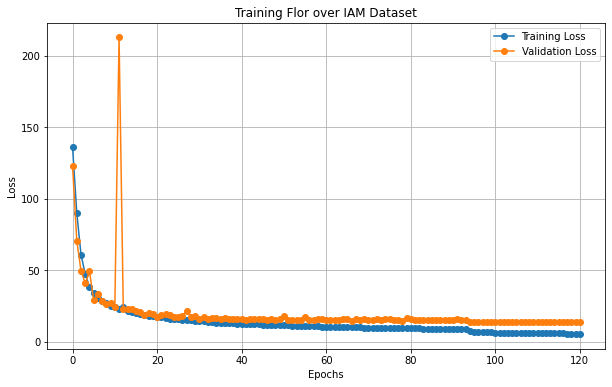

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the text file
data = pd.read_csv('/home/project/Desktop/shashank/English HTR/output/iam/flor/2023-09-27 02:53:40.574045/epochs.log', delimiter=';')

# Extract the loss and val_loss values
loss = data['loss']
val_loss = data['val_loss']
epochs = data['epoch']

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')

# Customize the plot
plt.title('Training Flor over IAM Dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
